In [9]:
"""
SETTING UP A NEW ENVIRONMENT (GEO)

conda create -n geo
conda activate geo
conda config --env --add channels conda-forge
conda config --env --set channel_priority strict
conda install python=3 geopandas
conda install spyder
conda install folium
conda install jupyter

ipython kernel install --user --name=geo

In jupyter notebooks, you might have to change your kernel to "geo"


"""

'\nSETTING UP A NEW ENVIRONMENT (GEO)\n\nconda create -n geo\nconda activate geo\nconda config --env --add channels conda-forge\nconda config --env --set channel_priority strict\nconda install python=3 geopandas\nconda install spyder\nconda install folium\nconda install jupyter\n\nipython kernel install --user --name=geo\n\nIn jupyter notebooks, you might have to change your kernel to "geo"\n\n\n'

In [1]:
import geopandas as gpd 
#import matplotlib.pyplot as plt
# import contextily as ctx
#import contextily as ctx

In [3]:
import contextily as ctx

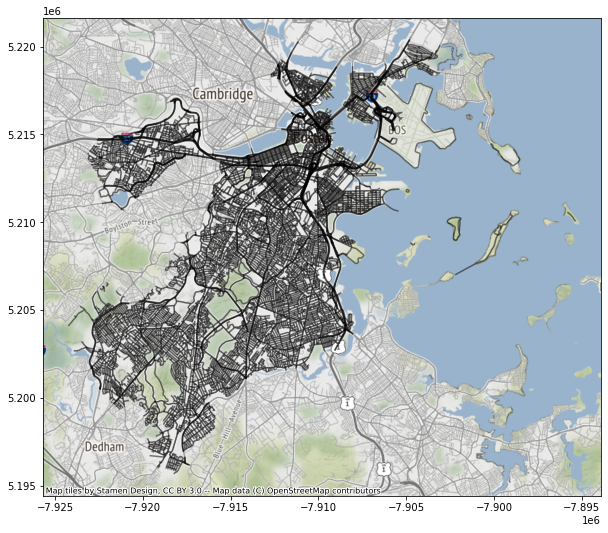

In [4]:

# Plot a map of boston
bos = gpd.read_file("streets.json")
bos = bos.to_crs(epsg=3857)
ax = bos.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)




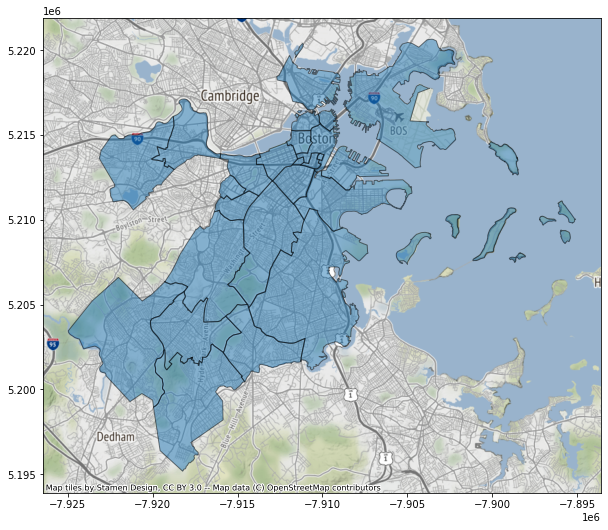

In [11]:
# The effects of climate change, Sea level changes
# Red = 36"
# Purple = 24"
# Blue = 9"

bos = gpd.read_file("boston.json")
bos = bos.to_crs(epsg=3857)
ax = bos.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# Sea rise
# c36 = gpd.read_file("climate_36.geojson").to_crs(epsg=3857)
# c24 = gpd.read_file("climate_21.geojson").to_crs(epsg=3857)
# c09 = gpd.read_file("climate_09.geojson").to_crs(epsg=3857)


# c36.plot(color='red', alpha=0.5, ax=ax)
# c24.plot(color='purple', alpha=0.5, ax=ax)
# c09.plot(color='blue', alpha=0.5, ax=ax)

<AxesSubplot:>

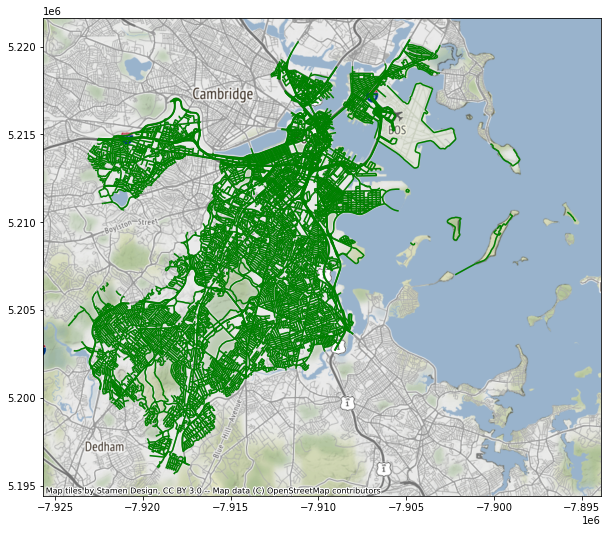

In [9]:
# Plot a map of boston

import geopandas as gpd
import contextily as ctx

bos = gpd.read_file("streets.json")
bos = bos.to_crs(epsg=3857)
ax = bos.plot(figsize=(10, 10), alpha=0.15, edgecolor='k')
ctx.add_basemap(ax)


# Other Boston Attributes
#trees = gpd.read_file("trees.shp").to_crs(epsg=3857)
#hosp = gpd.read_file("hospitals.geojson").to_crs(epsg=3857)
#coll = gpd.read_file("colleges.geojson").to_crs(epsg=3857)
#wifi = gpd.read_file("wifi.geojson").to_crs(epsg=3857)
#bikes = gpd.read_file("bikes.geojson").to_crs(epsg=3857)

sts = gpd.read_file("streets.json").to_crs(epsg=3857)

#trees.plot(color='green', markersize=1, ax=ax)
#hosp.plot(color='pink', markersize=10, ax=ax)
#coll.plot(color='purple', markersize=10, ax=ax)
#wifi.plot(color='white', markersize=10, ax=ax)
#bikes.plot(color='green', markersize=1, ax=ax)
sts.plot(color='green', markersize=1, ax=ax)


In [27]:
d = sts[sts["ST_TYPE"] == "00215"]
test = gpd.GeoDataFrame(d, crs="EPSG:3857")
test.plot(color='green', markersize=1, ax=ax)

<AxesSubplot:>

In [32]:
type(sts["geometry"])

geopandas.geoseries.GeoSeries

In [38]:
 from shapely.geometry import LineString, shape


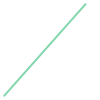

In [50]:
sts.iloc[0]["geometry"]


In [53]:
sts["points"] = sts.geometry.apply(lambda geom: geom.coords)

In [106]:
sts[sts["ST_NAME"] == "Tremont"].iloc[0]

OBJECTID                                                   6262
SEGMENT_ID                                                 7658
L_F_ADD                                                      60
L_T_ADD                                                      98
R_F_ADD                                                      59
R_T_ADD                                                      93
PRE_DIR                                                        
ST_NAME                                                 Tremont
ST_TYPE                                                      ST
SUF_DIR                                                        
MUN_L                                                    Boston
MUN_R                                                    Boston
CFCC                                                        A31
SPEEDLIMIT                                                   25
ONEWAY                                                       FT
HEIGHT                                  

In [143]:
def filter(geo):
    return (geo[0][0] >= -7914618.829 and geo[0][1] >= 5210000.379899886
            and geo[1][0]  <= -7910412.299132857 and geo[1][1] <= 5213000.419542872 )


<AxesSubplot:>

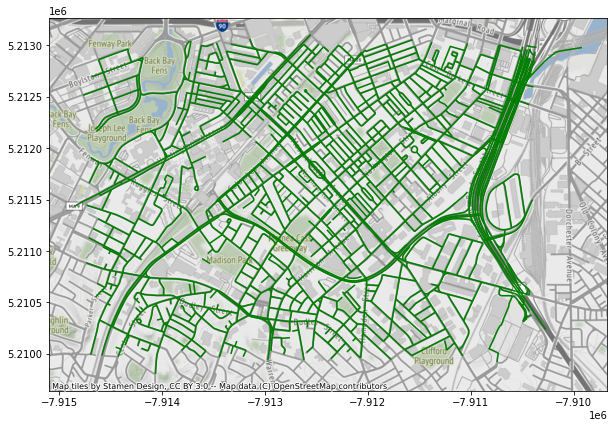

In [144]:
sts["points"] = sts.geometry.apply(lambda geom: geom.coords)
test = sts[sts.points.apply(filter) == True]
test = test.drop(columns="points")

test1 = test.to_crs(epsg=3857)
ax = test1.plot(figsize=(10, 10), alpha=0.15, edgecolor='k')
ctx.add_basemap(ax)

test.plot(color='green', markersize=1, ax=ax)


In [134]:
test[test["ST_NAME"] == "Gainsborough"]

,OBJECTID,SEGMENT_ID,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,PRE_DIR,ST_NAME,ST_TYPE,SUF_DIR,...,PLACE00_R,TRACT00_L,TRACT00_R,BLOCK00_L,BLOCK00_R,MCD00_L,MCD00_R,STREET_ID,SHAPElen,geometry
6913,6914,8541,72,108,69,113,,Gainsborough,ST,,...,07000,02115,02115,,,07000,07000,1658,600.992718,"LINESTRING (-7913439.096 5212382.731, -7913445..."
7136,7137,8847,52,58,49,55,,Gainsborough,ST,,...,07000,02115,02115,,,07000,07000,1658,118.813187,"LINESTRING (-7913368.765 5212318.623, -7913404..."
7137,7138,8848,60,70,57,67,,Gainsborough,ST,,...,07000,02115,02115,,,07000,07000,1658,111.946269,"LINESTRING (-7913404.475 5212352.186, -7913439..."
7832,7833,16593,24,36,25,35,,Gainsborough,ST,,...,07000,02115,02115,,,07000,07000,1658,292.489885,"LINESTRING (-7913219.667 5212182.746, -7913220..."
14453,14454,11938,2,22,1,23,,Gainsborough,ST,,...,07000,02115,02115,,,07000,07000,1658,280.181022,"LINESTRING (-7913134.295 5212104.868, -7913144..."
16405,16406,8846,38,50,37,47,,Gainsborough,ST,,...,07000,02115,02115,,,07000,07000,1658,156.264954,"LINESTRING (-7913321.731 5212274.555, -7913329..."
16406,16407,16594,,,,,,Gainsborough,ST,,...,07000,02115,02115,,,07000,07000,1658,40.427563,"LINESTRING (-7913308.777 5212264.061, -7913321..."


In [154]:
test[test["ST_NAME"] == "Forsyth"][test["ST_TYPE"] == "ST"]

/opt/anaconda3/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,OBJECTID,SEGMENT_ID,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,PRE_DIR,ST_NAME,ST_TYPE,SUF_DIR,...,PLACE00_R,TRACT00_L,TRACT00_R,BLOCK00_L,BLOCK00_R,MCD00_L,MCD00_R,STREET_ID,SHAPElen,geometry
2692,2693,3218,2,10,1,15,,Forsyth,ST,,...,07000,02115,02115,,,07000,07000,1592,154.468967,"LINESTRING (-7913841.741 5212169.358, -7913833..."
2693,2694,3219,12,30,17,31,,Forsyth,ST,,...,07000,02115,02115,,,07000,07000,1592,266.144434,"LINESTRING (-7913811.406 5212114.350, -7913773..."
15329,15330,26876,68,98,69,99,,Forsyth,ST,,...,07000,02115,02115,None,None,07000,07000,1592,95.311241,"LINESTRING (-7913717.259 5211852.357, -7913703..."
15558,15559,15169,100,150,101,149,,Forsyth,ST,,...,07000,02115,02115,,,07000,07000,1592,428.826627,"LINESTRING (-7913703.542 5211815.453, -7913691..."
15559,15560,27015,,,,,,Forsyth,ST,,...,07000,02115,02115,None,None,07000,07000,1592,324.446704,"LINESTRING (-7913660.774 5211644.213, -7913663..."
16411,16412,14725,32,66,33,67,,Forsyth,ST,,...,07000,02115,02115,,,07000,07000,1592,340.450205,"LINESTRING (-7913766.298 5211984.160, -7913717..."
16412,16413,14724,,,,,,Forsyth,ST,,...,07000,02115,02115,,,07000,07000,1592,67.621052,"LINESTRING (-7913773.477 5212011.160, -7913766..."


In [157]:
sts.iloc[15558]

OBJECTID                                                  15559
SEGMENT_ID                                                15169
L_F_ADD                                                     100
L_T_ADD                                                     150
R_F_ADD                                                     101
R_T_ADD                                                     149
PRE_DIR                                                        
ST_NAME                                                 Forsyth
ST_TYPE                                                      ST
SUF_DIR                                                        
MUN_L                                                    Boston
MUN_R                                                    Boston
CFCC                                                        A41
SPEEDLIMIT                                                   15
ONEWAY                                                         
HEIGHT                                  

In [165]:
import pandas as pd
test["points"] = sts.geometry.apply(lambda geom: geom.coords)
test.to_csv("street_data.csv")

In [164]:
test

,OBJECTID,SEGMENT_ID,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,PRE_DIR,ST_NAME,ST_TYPE,SUF_DIR,...,TRACT00_L,TRACT00_R,BLOCK00_L,BLOCK00_R,MCD00_L,MCD00_R,STREET_ID,SHAPElen,geometry,points
35,36,44,2,14,1,13,,Allerton,ST,,...,02119,02119,,,07000,07000,85,226.902340,"LINESTRING (-7911728.486 5210534.415, -7911658...","((-7911728.485703262, 5210534.414638403), (-79..."
36,37,45,16,30,15,23,,Allerton,ST,,...,02119,02119,,,07000,07000,85,189.633167,"LINESTRING (-7911658.346 5210472.494, -7911601...","((-7911658.345615875, 5210472.494380959), (-79..."
37,38,46,32,36,25,37,,Allerton,ST,,...,02119,02119,,,07000,07000,85,177.460647,"LINESTRING (-7911601.105 5210419.213, -7911547...","((-7911601.105308625, 5210419.212817068), (-79..."
38,39,47,38,98,39,59,,Allerton,ST,,...,02119,02119,,,07000,07000,85,198.064964,"LINESTRING (-7911547.916 5210368.947, -7911488...","((-7911547.915978381, 5210368.947332833), (-79..."
39,40,48,100,998,61,199,,Allerton,ST,,...,02119,02119,,,07000,07000,85,429.078939,"LINESTRING (-7911488.245 5210313.174, -7911440...","((-7911488.245158587, 5210313.174216248), (-79..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19111,19112,24585,208,244,207,245,W,Canton,ST,,...,02116,02116,,,07000,07000,691,382.218382,"LINESTRING (-7912241.602 5212812.736, -7912357...","((-7912241.602418286, 5212812.735546301), (-79..."
19183,19184,6387,1,19,2,20,,Prescott,ST,,...,02119,02119,,,07000,07000,3315,254.876883,"LINESTRING (-7912168.066 5210212.236, -7912167...","((-7912168.0657444, 5210212.236491597), (-7912..."
19184,19185,2510,2,8,1,7,,Dubois,ST,,...,02119,02119,,,07000,07000,1273,144.742920,"LINESTRING (-7912042.655 5210285.490, -7912101...","((-7912042.6546116555, 5210285.4895551745), (-..."
19185,19186,2509,10,28,9,27,,Dubois,ST,,...,02119,02119,,,07000,07000,1273,223.870882,"LINESTRING (-7912101.837 5210292.440, -7912128...","((-7912101.837375071, 5210292.439595256), (-79..."


In [155]:
test[test["ST_NAME"] == "Greenleaf"]["geometry"]

3058    LINESTRING (-7913703.542 5211815.453, -7913749...
Name: geometry, dtype: geometry

In [132]:
test.iloc[0]

OBJECTID                                                     36
SEGMENT_ID                                                   44
L_F_ADD                                                       2
L_T_ADD                                                      14
R_F_ADD                                                       1
R_T_ADD                                                      13
PRE_DIR                                                        
ST_NAME                                                Allerton
ST_TYPE                                                      ST
SUF_DIR                                                        
MUN_L                                                    Boston
MUN_R                                                    Boston
CFCC                                                        A41
SPEEDLIMIT                                                   20
ONEWAY                                                     None
HEIGHT                                  